# Classification

In [28]:
# This cell contains code form earlier notebooks, should be placed in util
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr, label, title):
    plt.figure()
    plt.plot(fpr, tpr, color='green', lw=2, label=label)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()


def get_training_data_roc_cv(clf, x, y):
    # ROC curve  on the training data
    predictions_rf = cross_val_predict(clf, x, y, cv=2, method="predict_proba")
    fpr, tpr, thresholds = metrics.roc_curve(y, predictions_rf[:, 1], pos_label=1)
    roc_auc = metrics.auc(fpr, tpr)
    plot_roc_curve(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.3f})', title="GILGFVFTL")
    print(f"ROC AUC: {roc_auc}")

def fix_test(x_test, train_columns):
    # x_test.fillna(0, inplace=True)
    for col in train_columns:
        if col not in x_test.columns:
            x_test[col] = 0
    # remove all columns from x_test that are not in x
    x_test = x_test[train_columns]
    return x_test

In [29]:
from util import get_train_dataset, get_features
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split

df = get_train_dataset()
train, test = train_test_split(df, test_size=0.2, random_state=42)

x = get_features(train)  # contains both alfa and beta features
y = train['reaction']
print(x.shape, y.shape)
assert x.shape[0] == y.shape[0]

x_test = get_features(test, test=True)
x_test = fix_test(x_test, x.columns)
y_test = test['reaction']
assert x_test.shape[0] == y_test.shape[0]

x_no_nan = x.fillna(0)
x_test_no_nan = x_test.fillna(0)

n_trees = 200

clf = HistGradientBoostingClassifier(verbose=2)

(6645, 1329) (6645,)


C:\Users\arnod\AppData\Local\Temp/ipykernel_46300/2350080507.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0


In [30]:
clf.fit(x_no_nan, y)

Binning 0.071 GB of training data: 0.311 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 29 leaves, max depth = 18, in 0.327s
[2/100] 1 tree, 31 leaves, max depth = 19, in 0.317s
[3/100] 1 tree, 31 leaves, max depth = 20, in 0.311s
[4/100] 1 tree, 28 leaves, max depth = 20, in 0.328s
[5/100] 1 tree, 31 leaves, max depth = 20, in 0.333s
[6/100] 1 tree, 31 leaves, max depth = 22, in 0.304s
[7/100] 1 tree, 31 leaves, max depth = 23, in 0.309s
[8/100] 1 tree, 31 leaves, max depth = 22, in 0.312s
[9/100] 1 tree, 31 leaves, max depth = 20, in 0.329s
[10/100] 1 tree, 31 leaves, max depth = 21, in 0.306s
[11/100] 1 tree, 31 leaves, max depth = 20, in 0.310s
[12/100] 1 tree, 31 leaves, max depth = 20, in 0.315s
[13/100] 1 tree, 31 leaves, max depth = 21, in 0.310s
[14/100] 1 tree, 31 leaves, max depth = 20, in 0.320s
[15/100] 1 tree, 31 leaves, max depth = 21, in 0.297s
[16/100] 1 tree, 31 leaves, max depth = 20, in 0.312s
[17/100] 1 tree, 31 leaves, max depth = 20, in 0.330s
[18/100] 1 tree

HistGradientBoostingClassifier(verbose=2)

In [31]:
y_pred = clf.predict(x_test_no_nan)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5252707581227437

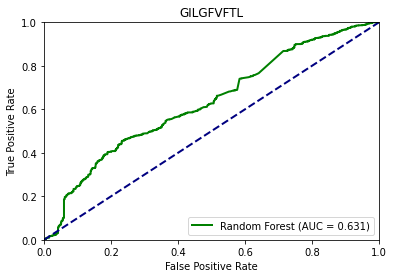

[[ 72 769]
 [ 20 801]]


In [33]:
# ROC curve on the test data
predictions_rf = clf.predict_proba(x_test_no_nan)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions_rf[:, 1], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

plot_roc_curve(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.3f})', title="GILGFVFTL")

# Also print the confusion matrix
y_pred = clf.predict(x_test_no_nan)
print(metrics.confusion_matrix(y_test, y_pred))

Worse than expected (but it doesn't have missing values, since we fill them with 0)).
Let's try random forest again.

building tree 1 of 200


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  3.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


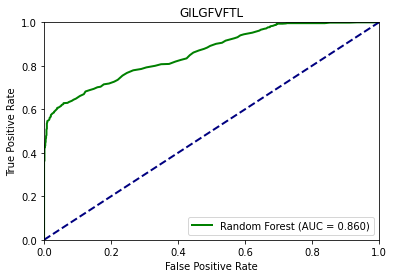

[[797  44]
 [312 509]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


In [34]:
from sklearn.ensemble import RandomForestClassifier

clf_random_forest = RandomForestClassifier(n_estimators=200, verbose=2)
clf_random_forest.fit(x_no_nan, y)

# ROC curve on the test data
predictions_rf = clf_random_forest.predict_proba(x_test_no_nan)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions_rf[:, 1], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

plot_roc_curve(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.3f})', title="GILGFVFTL")

# Also print the confusion matrix
y_pred = clf_random_forest.predict(x_test_no_nan)
print(metrics.confusion_matrix(y_test, y_pred))

Try with nan's now

In [35]:
clf = HistGradientBoostingClassifier(verbose=2)
clf.fit(x, y)

Binning 0.071 GB of training data: 0.367 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 29 leaves, max depth = 18, in 0.309s
[2/100] 1 tree, 31 leaves, max depth = 19, in 0.325s
[3/100] 1 tree, 31 leaves, max depth = 20, in 0.302s
[4/100] 1 tree, 28 leaves, max depth = 20, in 0.308s
[5/100] 1 tree, 31 leaves, max depth = 20, in 0.293s
[6/100] 1 tree, 31 leaves, max depth = 22, in 0.302s
[7/100] 1 tree, 31 leaves, max depth = 23, in 0.303s
[8/100] 1 tree, 31 leaves, max depth = 22, in 0.299s
[9/100] 1 tree, 31 leaves, max depth = 20, in 0.297s
[10/100] 1 tree, 31 leaves, max depth = 21, in 0.300s
[11/100] 1 tree, 31 leaves, max depth = 20, in 0.294s
[12/100] 1 tree, 31 leaves, max depth = 20, in 0.302s
[13/100] 1 tree, 31 leaves, max depth = 21, in 0.295s
[14/100] 1 tree, 31 leaves, max depth = 20, in 0.304s
[15/100] 1 tree, 31 leaves, max depth = 21, in 0.291s
[16/100] 1 tree, 31 leaves, max depth = 20, in 0.290s
[17/100] 1 tree, 31 leaves, max depth = 20, in 0.286s
[18/100] 1 tree

HistGradientBoostingClassifier(verbose=2)

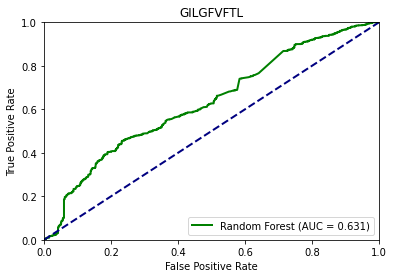

[[ 72 769]
 [ 20 801]]


In [36]:
# ROC curve on the test data
predictions_rf = clf.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions_rf[:, 1], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

plot_roc_curve(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.3f})', title="GILGFVFTL")

# Also print the confusion matrix
y_pred = clf.predict(x_test)
print(metrics.confusion_matrix(y_test, y_pred))